# 
- **Answer Set** : NO. 04
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

some basic operation in Voice and Image Processing using MATLAB

## Voice Processing

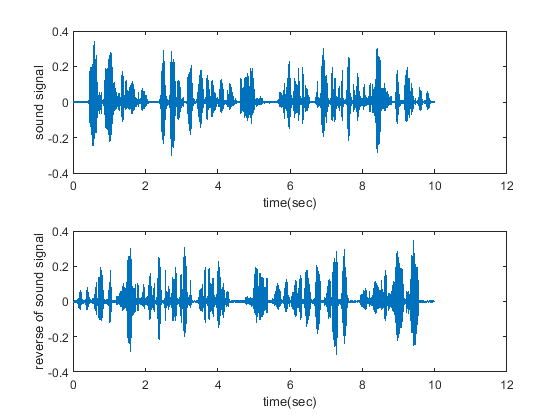

In [4]:
[y1,fs]=audioread('gettysburg10.wav');
y2=flipud(y1); %reverse of sound file
time=(1/fs)*length(y1);
t=linspace(0,time,length(y1));
subplot(2,1,1)
plot(t,y1)
xlabel('time(sec)');ylabel('sound signal')
subplot(2,1,2)
plot(t,y2)
xlabel('time(sec)');ylabel('reverse of sound signal')


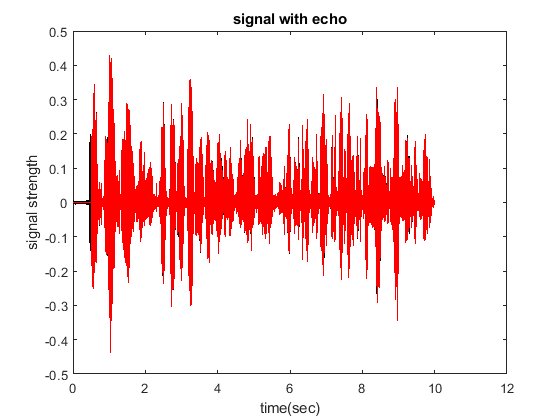

In [5]:
%% echo
N=fs/2;
b=y1(1:length(y1)); 
for n=N+1:length(b);
    b_echo(n)=b(n)+b(n-N);
end;
figure(2)
time1=(1/fs)*length(b);
t1=linspace(0, time, length(b));
plot(t1,b,'k',t1,b_echo,'r'); 
xlabel('time(sec)');
ylabel('signal strength');
title('signal with echo');



H = 

         FilterStructure: 'Direct-Form II, Second-Order Sections'
              Arithmetic: 'double'                               
               sosMatrix: [24x6 double]                          
             ScaleValues: [25x1 double]                          
     OptimizeScaleValues: true                                   
        PersistentMemory: false                                  
                                                                 



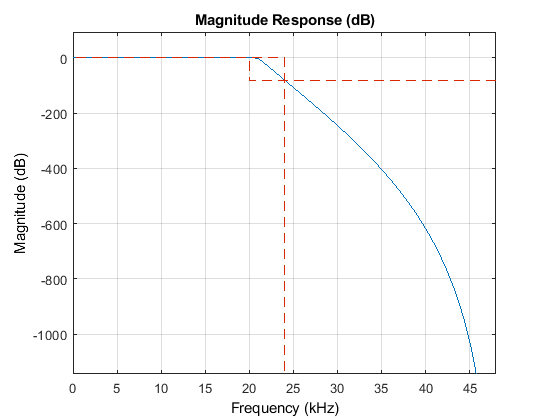

In [6]:
Fs=96e3;
Fpass=20e3;
Fstop=24e3;
Apass=0.01;
Astop=80;
filtSpecs=fdesign.lowpass(Fpass,Fstop,Apass,Astop,Fs);
H=design(filtSpecs,'butter')
fvtool(H)


> In matlab.graphics.chart.internal.getRealData (line 52)
In stem (line 40)



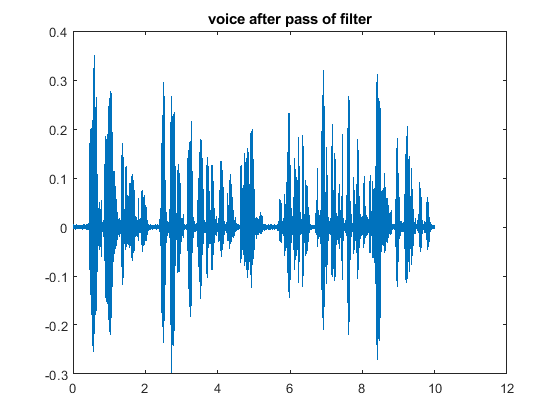

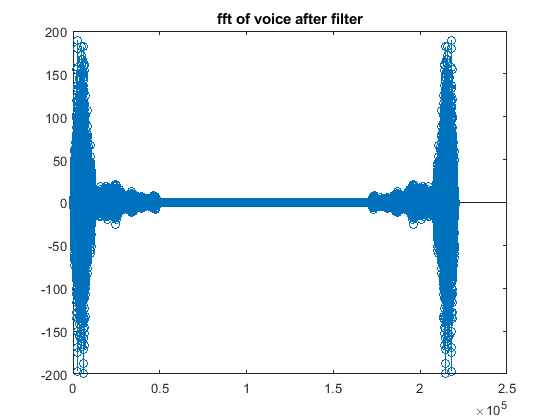

In [8]:
y3=filter(H,y1);
y3a=fft(y3);
figure(4)
plot(t,y3)
title('voice after pass of filter')
figure(5)
stem(y3a)
title('fft of voice after filter')


## Image Processing

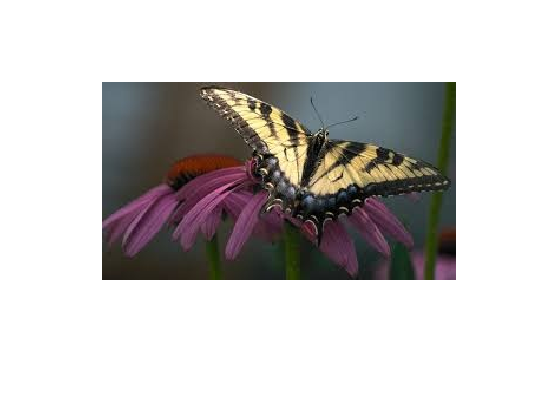

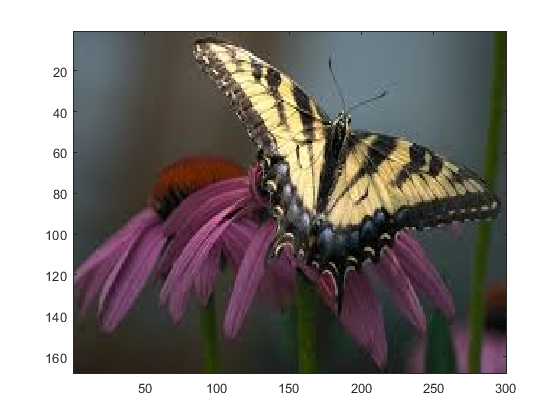

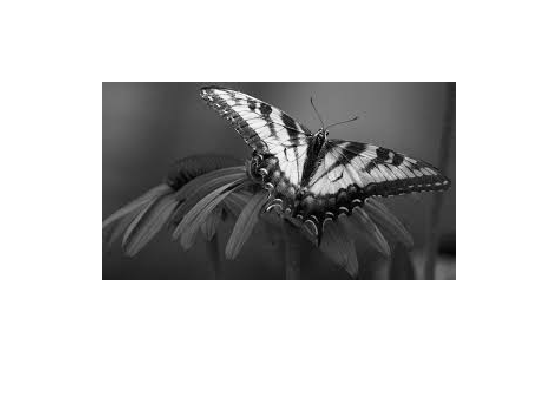

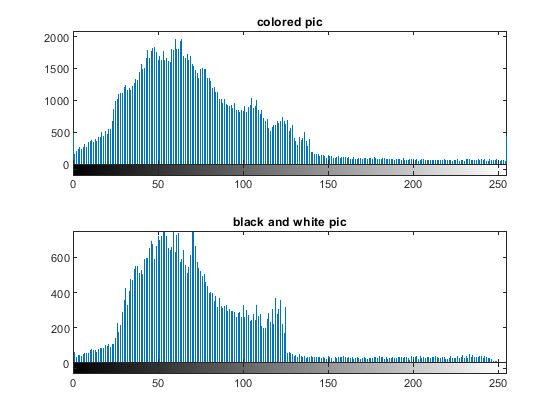

In [9]:
clear;clc
img1=imread('image.jpg');
figure(1)
imshow(img1)
figure(2)
imagesc(img1)
figure(3)
img2=rgb2gray(img1);
imshow(img2)
figure(4)
subplot(2,1,1)
imhist(img1)
title('colored pic')
subplot(2,1,2)
imhist(img2)
title('black and white pic')


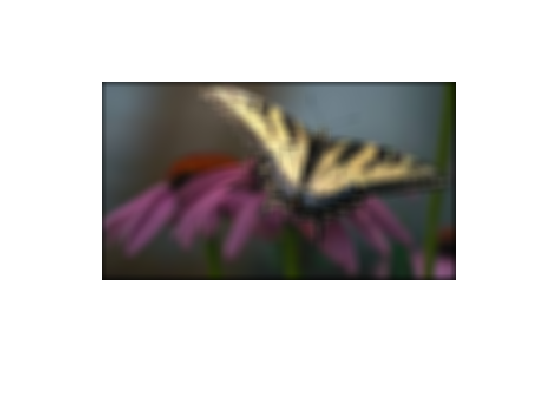

In [10]:
img = imread('image.jpg');
imgd = im2double(img);
x=10;
f=ones(x)./x^2;
img1=imfilter(imgd,f);
imshow(img1);


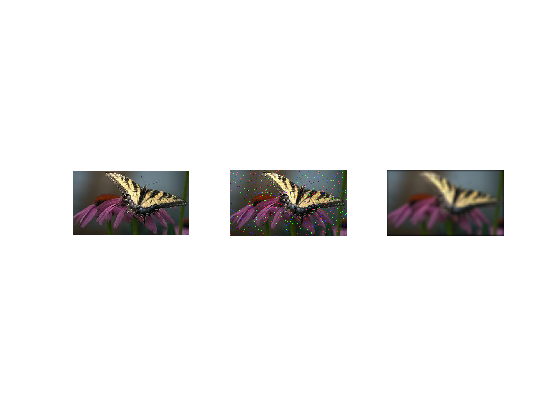

In [11]:
img=imread('image.jpg');
imgd1=im2double(img); % imgd in [0,1]
imgd2=imnoise(imgd1,'salt & pepper',0.02);
x=10;
f=ones(x)./x^2;
img3=imfilter(imgd1,f);
subplot(1,3,1);imshow(imgd1);
subplot(1,3,2);imshow(imgd2);
subplot(1,3,3);imshow(img3);


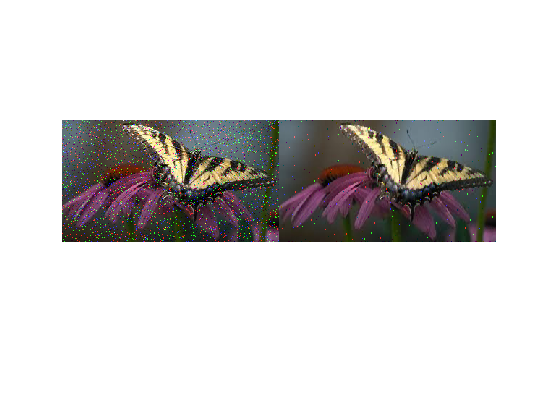

In [12]:
img = imread('image.jpg');
imgd=im2double(img);
img1=imnoise(imgd,'salt & pepper',0.05);
img2=medfilt1(img1);
imshowpair(img1,img2,'montage')


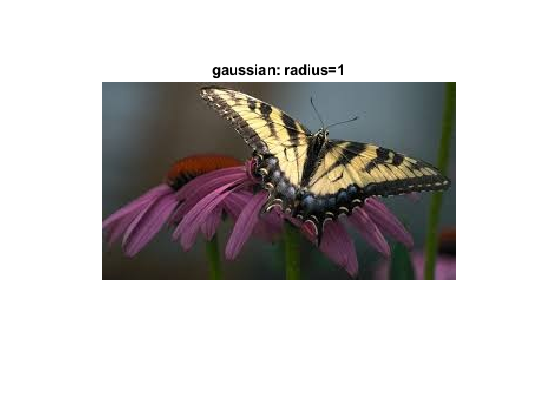

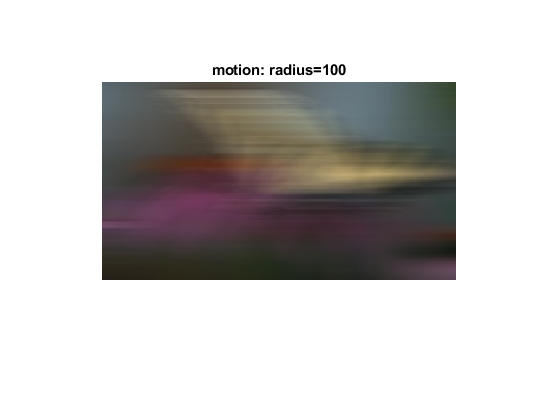

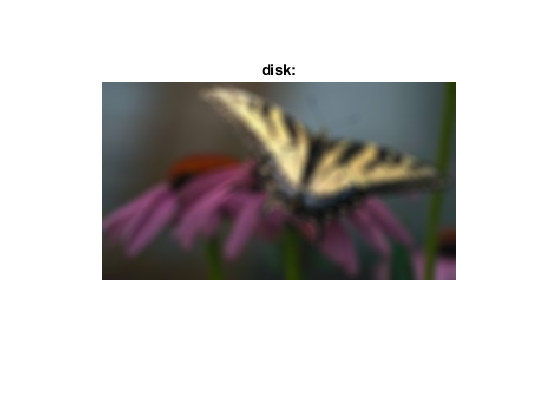

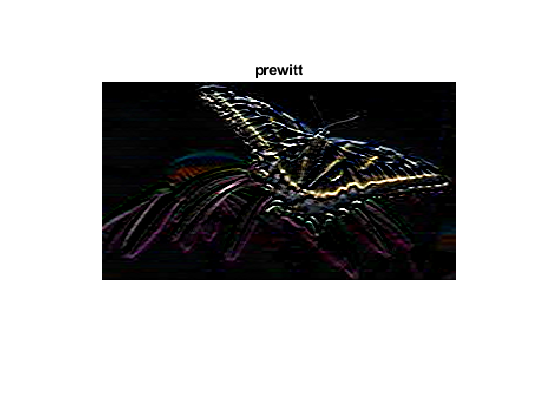

In [13]:
img=imread('image.jpg');
radius=1;
f1=fspecial('gaussian', radius);
img1=imfilter(img,f1,'replicate');
radius=100;
f2=fspecial('motion', radius);
img2=imfilter(img,f2,'replicate');
f3=fspecial('disk');
img3=imfilter(img,f3,'replicate');
f4=fspecial('prewitt');
img4=imfilter(img,f4,'replicate');
figure(1);imshow(img1);title('gaussian: radius=1');
figure(2);imshow(img2);title('motion: radius=100');
figure(3);imshow(img3);title('disk:');
figure(4);imshow(img4);title('prewitt');
